# ghg_analytics
## Insights into trends with global greenhouse gases and climate change action.

EPA1333 – Computer Engineering for Scientific Computing Final Project

### Authors
Group 6:
* Aashna Mittal
* Gamze Ünlü
* Jason R Wang

In [258]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import NaN
plt.style.use('ggplot')

## Data Cleaning

### For Current Greenhouse Gas Emissions
Source: https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE?view=chart
(Is this true, Aashna?) - Jason

In [259]:
#Import data on Greenhouse Gases
GreenhouseGasesOriginalDf = pd.read_csv("data/GreenhouseGasData.csv", sep=',', skipinitialspace=True, skiprows=4) 
#print("Original dataframe...\n", GreenhouseGasesOriginalDf.head(10))

#Drop the indicator name and indicator code as the values are same across the whole dataframe
GreenhouseGasesDf = GreenhouseGasesOriginalDf.drop(["Indicator Code", "Indicator Name"], axis = 1)

#Drop all the columns that contain only null values
GreenhouseGasesDf.dropna(axis = 1, how="all", inplace=True)  

#Drop all the rows that contain only null values, starting from column 2
GreenhouseGasesDf.dropna(axis = 0, how="all", subset = GreenhouseGasesDf.columns[2:], inplace= True)  

#First interpolate missing values and then use backfill to fill starting NA values of a row
GreenhouseGasesDf.iloc[:,2:] = GreenhouseGasesDf.iloc[:,2:].interpolate(axis = 1).bfill(axis=1)

GreenhouseGasesDf.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,42.306298,42.786948,43.286613,43.724590,44.130957,44.481908,131.633746,135.055319,...,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02
1,Afghanistan,AFG,14306.616300,14391.778200,13040.848000,13535.754100,14945.968200,14574.164000,14746.851000,15247.281000,...,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04,1.798131e+04,1.816886e+04
2,Angola,AGO,60648.601080,39162.171430,42205.650700,44252.669120,40179.233500,44429.300030,38448.024090,43563.412180,...,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04,4.087865e+04,4.165716e+04
3,Albania,ALB,6960.868200,6950.036100,7613.266100,7348.492100,7632.664300,7873.037000,8470.978400,8948.980900,...,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03,8.712296e+03,8.898641e+03
5,Arab World,ARB,552362.062026,576946.152269,625015.943839,699280.217253,679448.005841,683966.235399,775863.729505,799971.040800,...,1.963193e+06,1.660587e+06,1.767879e+06,1.731289e+06,2.355481e+06,2.364089e+06,2.387502e+06,1.924245e+06,2.483349e+06,1.908696e+06


### Create Comparison for Country Group Codes and Names

In [260]:
#Import the dataframe which contains the codes of country group aggregates
CountryGroupCodes = pd.read_excel("data/CountryGroups.xls", sheet = "Groups", skiprows=226, header = None)
CountryGroupCodes.dropna(how="all", inplace=True, axis=1)
CountryGroupCodes.drop(columns=0,inplace=True)
CountryGroupCodes.dropna(how="all", inplace=True, axis=0)
CountryGroupCodes.columns = ["Aggregate Name", "Aggregate Code"]
CountryGroupCodes

#Drop the rows corresponding to aggregate country codes from existing dataframe to create a new country dataframe 
GreenhouseGasesCountryDf = GreenhouseGasesDf[GreenhouseGasesDf["Country Code"].apply(lambda x: False if x in CountryGroupCodes["Aggregate Code"].values else True)]

## Data visualization

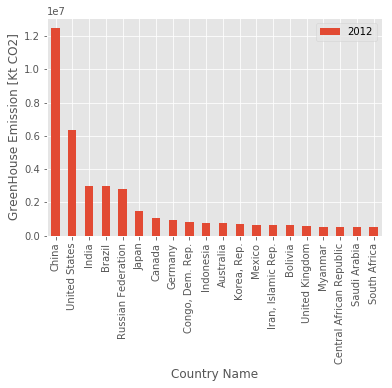

In [261]:
#Sorted bar chart of 2012 greenhouse gases

GreenhouseGasesCountryDf.sort_values(by="2012", ascending=False)[["Country Name", "2012"]]

GreenhouseGasesTop20Emitters = GreenhouseGasesCountryDf.sort_values(by = "2012", ascending = False).iloc[:20,:]

GreenhouseGasesTop20Emitters[["Country Name", "2012"]].plot(x = "Country Name", kind="bar")

plt.ylabel("GreenHouse Emission [Kt CO2]")
plt.show()

Time series for greenhouse gases of major (top 10 depending on V1) present polluters (from 1990 to most-recent)

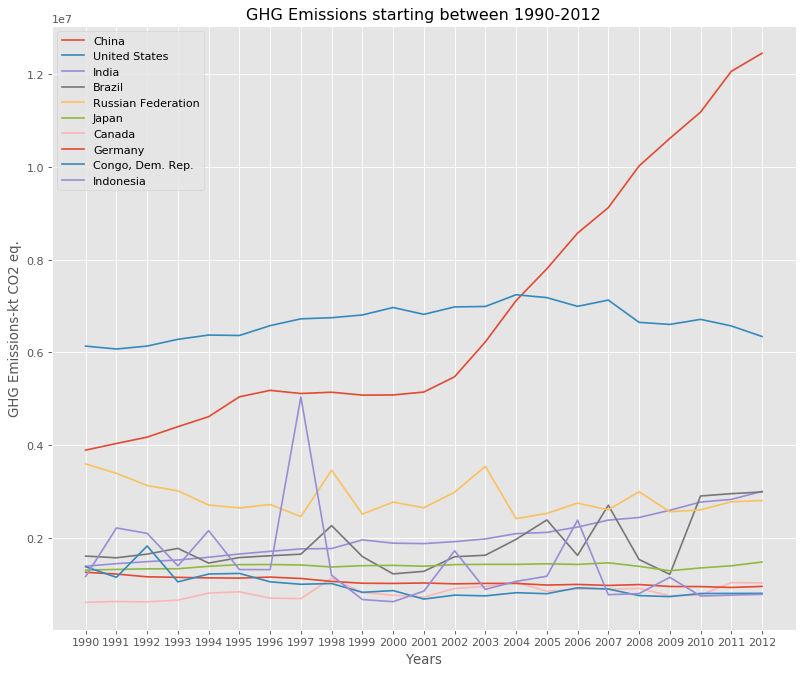

In [262]:
# Time series for ghg emissions of the top 10 most polluting countries.

GreenhouseGasesTop10Emitters = GreenhouseGasesCountryDf.sort_values(by = "2012", ascending = False).iloc[:10,:]

plt.figure(figsize=(12, 10), dpi=80) 

for i in range(0,10):
    
    row = GreenhouseGasesTop10Emitters.iloc[i,22:]
    plt.plot(row)

plt.MaxNLocator(10)
plt.xlabel("Years")
plt.ylabel("GHG Emissions-kt CO2 eq.")
plt.title("GHG Emissions starting between 1990-2012")
#plt.legend(loc=((1.05,0.3)))#how to show country names instead of the numbers 
plt.legend(GreenhouseGasesTop10Emitters["Country Name"] )

plt.show()

We observe that the top polluter of the world China has increasing emissions starting from 1990s till 2012. The second polluter US, on the other hand shows a stable curve over the years. Until 2004 it is the top polluter of the world. India........

## NDCs
This file gives data in the format: ISO Country Code,Country Name, Goal Year, Value (in MtCO2e), if goal is a range, and the type of goal.

In [303]:
NDCsDf_raw = pd.read_csv('data/wri/CW_NDC_quantification_April30.csv')
NDCsDf = NDCsDf_raw.dropna(axis=0).drop(328)

# Check data input
NDCsDf.head(5)

,ISO,Country,Year,Value,Range,Label
0,AFG,Afghanistan,2020,35.5,No,BAU
1,AFG,Afghanistan,2025,40.3,No,Conditional
2,AFG,Afghanistan,2025,41.7,No,BAU
3,AFG,Afghanistan,2030,42.7,No,Conditional
4,AFG,Afghanistan,2030,48.9,No,BAU


Some countries' NDCs are given as a range. For simplicity, this analysis will only examine the mean of that range.

In [264]:
rangedIndices = NDCsDf[NDCsDf['Range'] == 'Yes'].index

# Note that each range is a pair
# Is there a non-for loop method to do this?
for i in range(0,len(rangedIndices)-1,2):    
    NDCsDf.loc[rangedIndices[i],'Value'] = (
        (NDCsDf['Value'][rangedIndices[i]] + NDCsDf['Value'][rangedIndices[i+1]])/2
    )
    
# Drop the column 'Range', since it is not really needed anymore.
NDCsDf = NDCsDf.drop(labels=rangedIndices[1::2], axis=0).drop(labels='Range', axis=1)

From here on, the situation in 2030 will be the primary focus. Where countries have not submitted data for 2030, the furthest value is used. Furthermore, the best case where the higher goal between choices (e.g. uncondintional if both it and conditional exist) is taken.

Note that the EU, which is collectively a large emitter, has only submitted NDCs for 2020.

In [265]:
NDC_byCountry = []

for i in NDCsDf['ISO'].unique():
    NDC_byCountry.append(NDCsDf[NDCsDf['ISO']==i]['Value'].min() )

In [266]:
d = {
    'Country': NDCsDf['ISO'].unique(),
    'Goal':    NDC_byCountry 
}

NDCs_clean = pd.DataFrame(d)

In [267]:
NDCs_clean.head()

,Country,Goal
0,AFG,35.5000
1,ALB,5.4500
2,AND,0.3299
3,AGO,96.6300
4,ATG,0.2910


## Data visualization

In [268]:
NDCs_clean.head()

,Country,Goal
0,AFG,35.5000
1,ALB,5.4500
2,AND,0.3299
3,AGO,96.6300
4,ATG,0.2910


In [283]:
#Greenhouse reductions by countries according to their NDCs. Data is already converted to mtCO2e. Countries have different goals 
#in terms of which year they are based on and which year they aim also unconditional and conditional goals. Here the goals are  
#not based on year target but the minimum goal of each country is choosen?? 

#See if the ones who are most polluting also have the highest reduction aim

GreenhouseGasesTop10Emitters

NDCsTop10 = NDCs_clean[NDCs_clean["Country"].apply(lambda x: True if x in GreenhouseGasesTop10Emitters["Country Code"].values else False)]

NDCsTop10

NDCsTop10= NDCsTop10.sort_values(by="Goal", ascending=False)

NDCsTop10.plot(x = "Country", kind="bar")

plt.ylabel("Nationally Determined Contributions [Kt CO2]")
plt.show()

,Country,Goal
17,BRA,1197.00
23,CAN,523.00
26,CHN,10456.53
30,COD,356.90
50,DEU,1000.73
60,IND,4298.31
61,IDN,1740.50
66,JPN,1042.00
111,RUS,2849.25
140,USA,4805.10


IND-India
IDN-Indonesia
In the first graph we observed that China,US and India are the top 3 major polluters and their reduction targets allign with this ranking. In the greenhouse gases emission graph the list goes on as Brazil, Russia, Japan, Canada, Germany, Congo and Indonesia. Among these countries even though Indonesia is the least polluting among these, it has higher reduction goals than many of the rest of the countries. 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


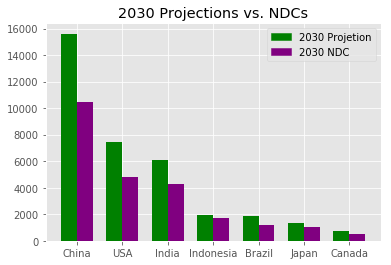

In [313]:
from numpy import array
import matplotlib.patches as mpatches

#The data for the no policy scenario and values for greenhouse gases

ghgForecast_GCAM2 = pd.read_csv('data/wri/Pathways/GCAM.csv').drop(['Model'],axis=1)
ghgForecast_GCAM2

ghgForecast_GCAM2_BAU= ghgForecast_GCAM2[ (ghgForecast_GCAM2['Scenario'] == 'No policy') &
                    (ghgForecast_GCAM2['ESP Indicator Name'].str.startswith('Emissions|GHG'))] 

# Filter the top 10 countries that was determined according to worldbank data. Countries have multiple entries according
#to different type of greenhouse gases. We need the sum. Russia, Germany and Congo do not have 2030 projections in the dataset. 

ghgTop10 = ghgForecast_GCAM2_BAU[ghgForecast_GCAM2_BAU["Region"].apply(lambda x: True if x in GreenhouseGasesTop10Emitters["Country Name"].values else False)]
Top10byCountry=ghgTop10.groupby(["Region"])["2030"].sum().sort_values(ascending=False)

#NDCs of the top 10 countries. 

NDCsTop10= NDCsTop10.sort_values(by="Goal", ascending=False)

#Values to use in the graph. Missing countries are dropped from NDC list. 

y1=Top10byCountry.values

y2=NDCsTop10[NDCsTop10['Country']!= "RUS"][NDCsTop10['Country']!= "DEU"][NDCsTop10['Country']!= "COD"]["Goal"].values

x=np.arange(len(y1))

#PLot bar-chart for the 7 countries. 

bar_width = 0.35 
plt.bar(x,y1,width=bar_width,color="green")
plt.bar(x+bar_width,y2,width=bar_width,color="purple")

plt.xticks(x+bar_width/2,["China","USA","India","Indonesia","Brazil","Japan","Canada"])
plt.title("2030 Projections vs. NDCs")

green_patch=mpatches.Patch(color="green",label="2030 Projetion")
purple_patch=mpatches.Patch(color="purple",label="2030 NDC")
plt.legend(handles=[green_patch,purple_patch])
